Top 10 correlated features with Tumor Response:
Tumor Response                                                       1.000000
Unnamed: 59                                                          0.212627
Pathologic Response to Neoadjuvant Therapy                           0.212145
MRI Technical Information                                            0.201852
Unnamed: 97                                                          0.178647
Grouping_based_proportion_of_tumor_voxels_3D_tumor_Group_3_y         0.167645
Grouping_based_proportion_of_tumor_voxels_3D_tumor_Group_3_x         0.167645
Grouping_based_proportion_of_tumor_voxels_2D_tumorSlice_Group_3_y    0.159604
Grouping_based_proportion_of_tumor_voxels_2D_tumorSlice_Group_3_x    0.159604
Unnamed: 8                                                           0.143146
Name: Tumor_Response_Encoded, dtype: float64


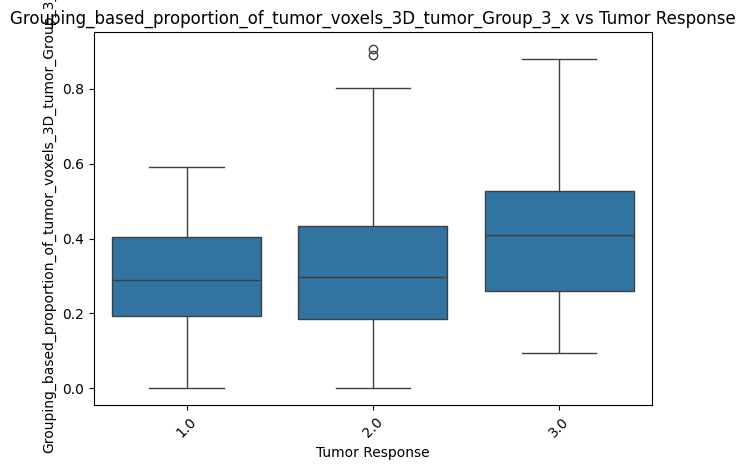

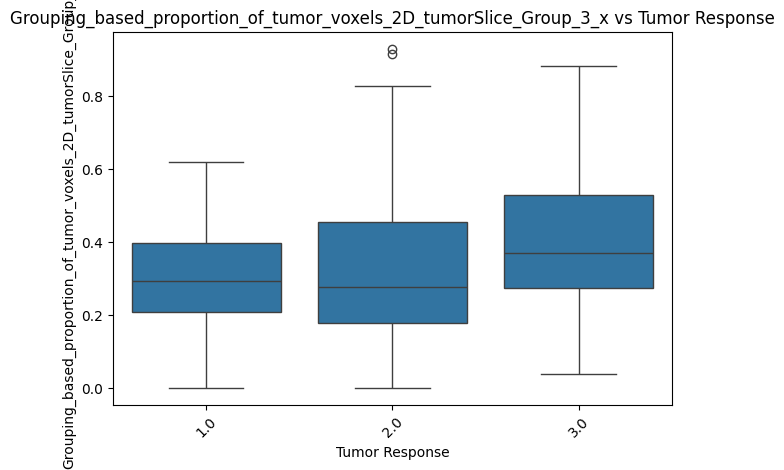

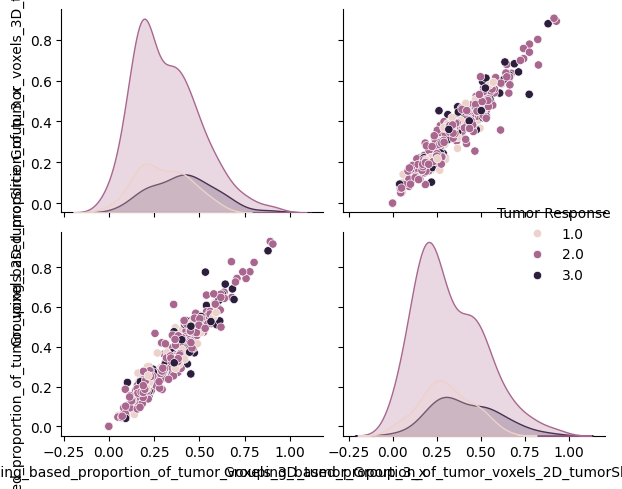

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned clinical
clinical = pd.read_csv("../data/processed/cleaned_clinical.csv")
imaging = pd.read_excel("../data/raw/Imaging_Features.xlsx")

# Clean Patient IDs
clinical["Patient ID"] = clinical["Patient ID"].astype(str).str.strip()
imaging["Patient ID"] = imaging["Patient ID"].astype(str).str.strip()

# Merge datasets
df = pd.merge(clinical, imaging, on="Patient ID", how="left")

# Encode Tumor Response
df["Tumor_Response_Encoded"] = LabelEncoder().fit_transform(df["Tumor Response"])

# Correlate numeric features with target
top_features = df.select_dtypes(include='number').corr()["Tumor_Response_Encoded"].drop("Tumor_Response_Encoded").sort_values(ascending=False)

# View top 10 strongest predictors
print("Top 10 correlated features with Tumor Response:")
print(top_features.head(10))

# Specify top features to visualize
top_feats = [
    "Grouping_based_proportion_of_tumor_voxels_3D_tumor_Group_3_x",
    "Grouping_based_proportion_of_tumor_voxels_2D_tumorSlice_Group_3_x"
]

# Boxplots for top features
for feat in top_feats:
    sns.boxplot(x="Tumor Response", y=feat, data=df)
    plt.title(f"{feat} vs Tumor Response")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Pairplot for top features
sns.pairplot(df[["Tumor Response", *top_feats]], hue="Tumor Response")
plt.tight_layout()
plt.show()
